# DATASCI 3ML3: Final Project

### Using Convolution Neural Networks to Classify Chords in Spectrograms

By: Arielle Ainabe

## Import Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
%matplotlib inline

jazznet data set citation:
[@online{adegbija23_jazznet,
 title  = {jazznet: A Dataset of Fundamental Piano Patterns for Music Audio Machine Learning Research},
 author = {Tosiron Adegbija},
 year   = {2023},
 booktitle = {IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP)}
 organization = {IEEE}
}]

In [2]:
# import - will always choose the first channel for simplicity
Fs, data = read('chords\maj7\Bb-1-maj7-chord-0.wav')
data = data[:,0]

print("Sampling Frequency is", Fs)
Audio(data, rate=Fs)

Sampling Frequency is 16000


## Visualize Data

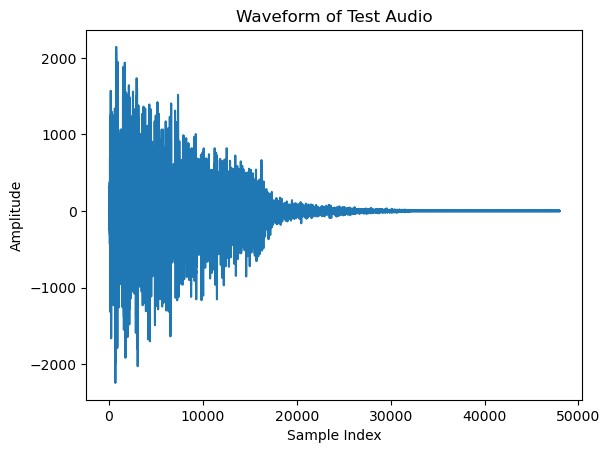

In [3]:
# General Waveform
plt.figure()
plt.plot(data)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Waveform of Test Audio')
plt.show()

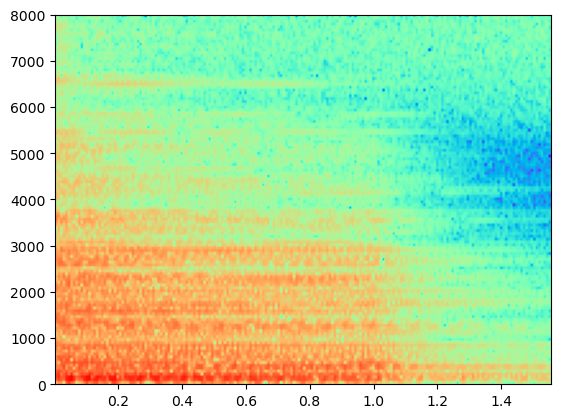

In [4]:
# Spectrogram
spectrum, freqs, t, im = plt.specgram(data[0:25000], Fs=Fs, cmap='rainbow')
# plt.ylim([0,1000])
plt.show()

Spectrum is a 2D array, where each column corresponds to a periodogram at different times. This array can be used to produce a spectrogram like the one above. Freqs, is the frequencies that are represented in the periodogram (the rows). And t is the time the periodogram is centred on (the columns). im is an image file that can be used in im.show(). I cut the data because half of the sample is just empty noise. If I use spectrograms as training data, it is kind of like training on 2D gray scale image. Therefore a CNN application may be best.

The next section of this report is devoted to exploring the audio files and learning how best to organize data for the model. There are many graphs that were produced and I decided to include all of them to show my work.

Shape of Spectrum
(129, 194)
(194,)


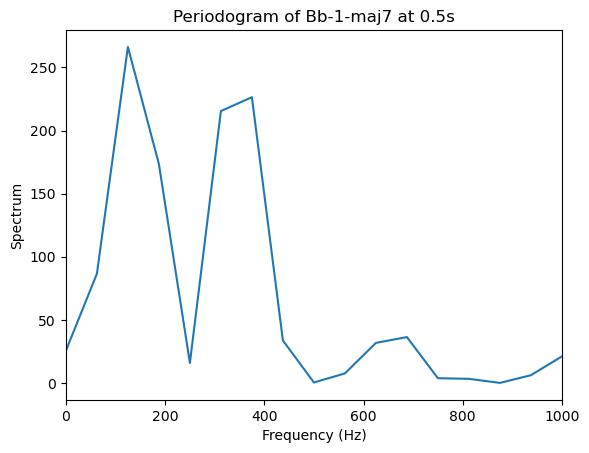

In [5]:
print("Shape of Spectrum")
print(spectrum.shape)
freqs.shape

# Plot Periodigram centred around 0.5 seconds (index = 62)
x = freqs
print(t.shape)
y=spectrum[:,62]
plt.plot(x, y)
plt.xlim([0,1000]) # there is very little amplitude for higher frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Periodogram of Bb-1-maj7 at 0.5s")
plt.show()

I noticed that with this tetrad chord (B flat major 7 - Bb, D, F and A) there are two main peaks, even though there are four notes in this chord. This is probably because the difference in hertz between the notes in this chord are on the scale of dozens so they may be lumped together in the same peak. Hopefully when this is run through a neural network the proper chord (and potentially its notes) can be distinguished. I'm going to see if dyad and triad chords look any different for the same scale (Bb major).

Sampling Frequency is 16000


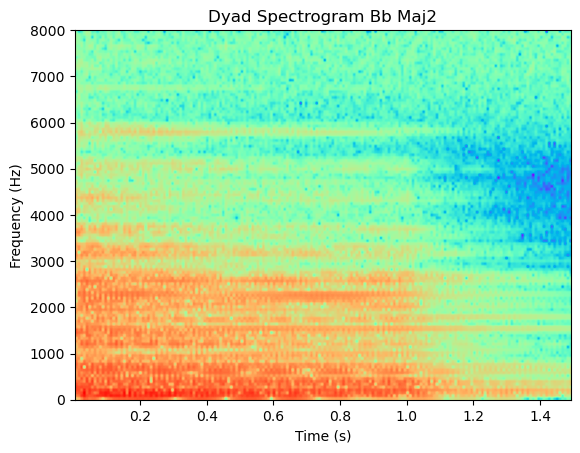

0.504


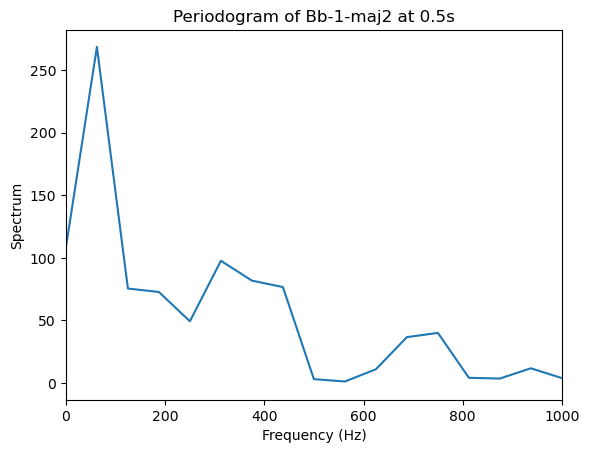

Sampling Frequency is 16000


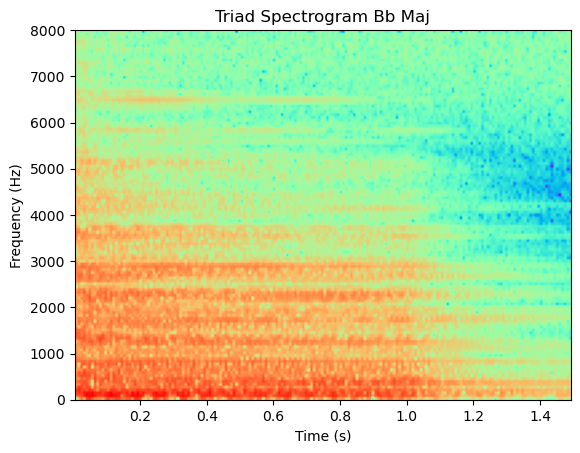

0.504


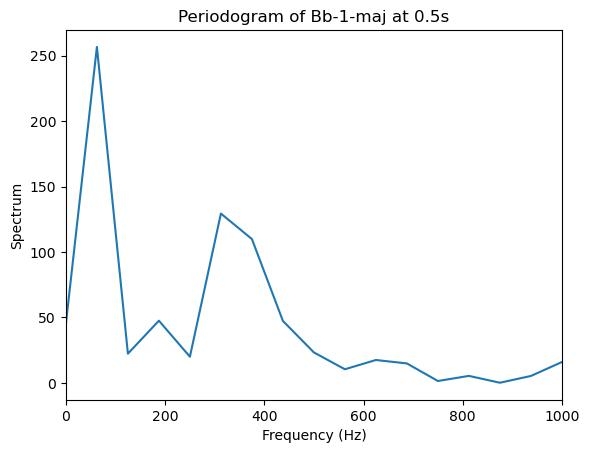

In [8]:
# Dyad Bb chord (2 notes)
# import - will always choose the first channel for simplicity
Fs, dyad = read('chords\maj2\Bb-1-maj2-chord-0.wav')
dyad = dyad[:,0]

print("Sampling Frequency is", Fs)

cutoff_time = 1.5 # where do we want to cut off (s)
cutoff = int(1.5*Fs) # where do we want to cut it off

# Spectrogram
spectrum, freqs, t, im = plt.specgram(dyad[0:cutoff], Fs=Fs, cmap='rainbow')
plt.title("Dyad Spectrogram Bb Maj2")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Plot Periodigram centred around 0.5 seconds (index = 62)
x = freqs
print(t[62])
y=spectrum[:,62]
plt.plot(x, y)
plt.xlim([0,1000]) # there is very little amplitude for higher frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Periodogram of Bb-1-maj2 at 0.5s")
plt.show()

# Triad Bb chord (3 notes)
# import - will always choose the first channel for simplicity
Fs, triad = read('chords\maj\Bb-1-maj-chord-0.wav')
triad = triad[:,0]

print("Sampling Frequency is", Fs)

cutoff_time = 1.5 # where do we want to cut off (s)
cutoff = int(1.5*Fs) # where do we want to cut it off

# Spectrogram
spectrum, freqs, t, im = plt.specgram(triad[0:cutoff], Fs=Fs, cmap='rainbow')
plt.title("Triad Spectrogram Bb Maj")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Plot Periodigram centred around 0.5 seconds (index = 62)
x = freqs
print(t[62])
y=spectrum[:,62]
plt.plot(x, y)
plt.xlim([0,1000]) # there is very little amplitude for higher frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Periodogram of Bb-1-maj at 0.5s")
plt.show()

Observations: I noticed that as the number of notes in the chord increases the two peaks becomes more defined, but are still in the same approximate location. Will do the same thing with a different major scale:

Sampling Frequency is 16000


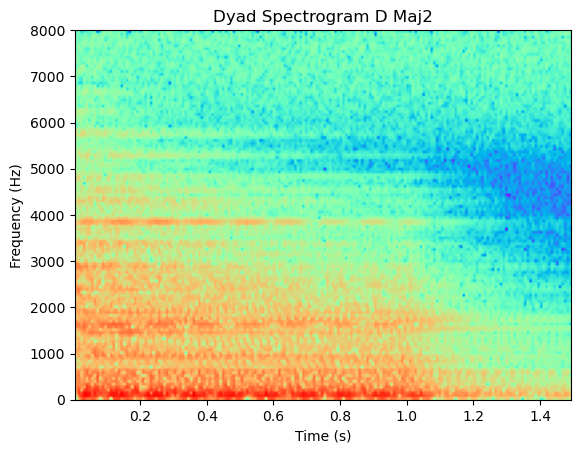

0.504


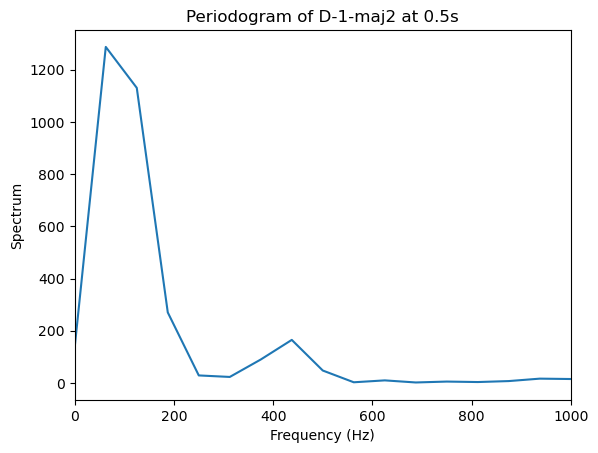

Sampling Frequency is 16000


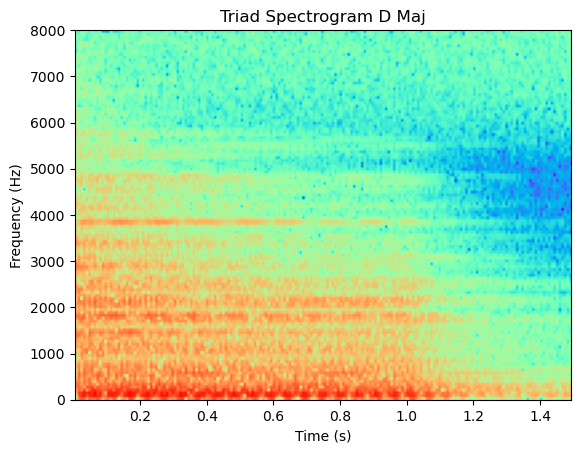

0.504


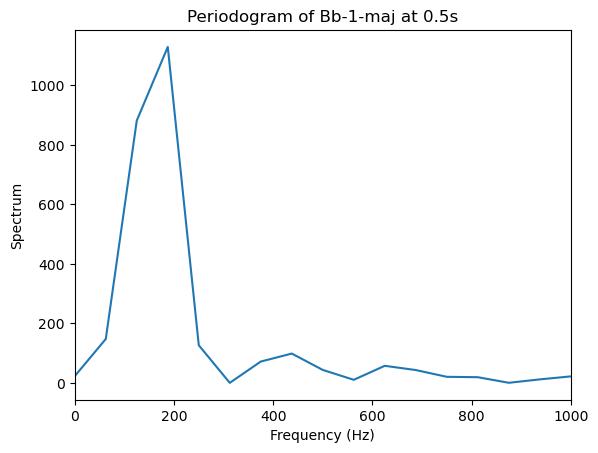

Sampling Frequency is 16000


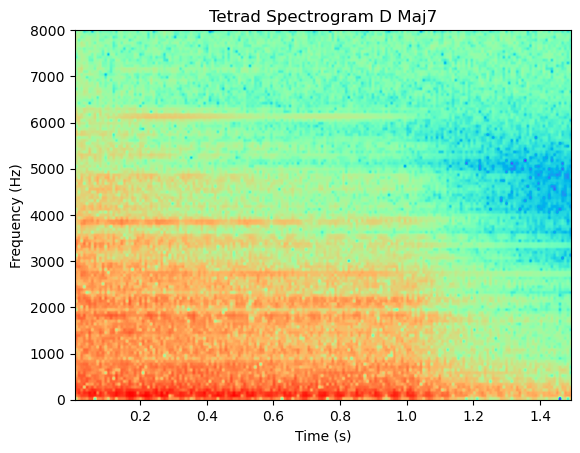

0.504


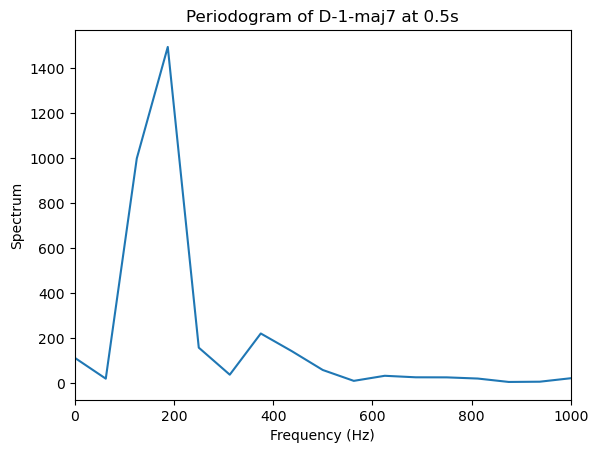

In [9]:
# Dyad D chord (2 notes)
# import - will always choose the first channel for simplicity
Fs, dyad = read('chords\maj2\D-1-maj2-chord-0.wav')
dyad = dyad[:,0]

print("Sampling Frequency is", Fs)

cutoff_time = 1.5 # where do we want to cut off (s)
cutoff = int(1.5*Fs) # where do we want to cut it off

# Spectrogram
spectrum, freqs, t, im = plt.specgram(dyad[0:cutoff], Fs=Fs, cmap='rainbow')
plt.title("Dyad Spectrogram D Maj2")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Plot Periodigram centred around 0.5 seconds (index = 62)
x = freqs
print(t[62])
y=spectrum[:,62]
plt.plot(x, y)
plt.xlim([0,1000]) # there is very little amplitude for higher frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Periodogram of D-1-maj2 at 0.5s")
plt.show()

# Triad Bb chord (3 notes)
# import - will always choose the first channel for simplicity
Fs, triad = read('chords\maj\D-1-maj-chord-0.wav')
triad = triad[:,0]

print("Sampling Frequency is", Fs)

# Spectrogram
spectrum, freqs, t, im = plt.specgram(triad[0:cutoff], Fs=Fs, cmap='rainbow')
plt.title("Triad Spectrogram D Maj")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Plot Periodigram centred around 0.5 seconds (index = 62)
x = freqs
print(t[62])
y=spectrum[:,62]
plt.plot(x, y)
plt.xlim([0,1000]) # there is very little amplitude for higher frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Periodogram of Bb-1-maj at 0.5s")
plt.show()

# Tetrad D chord (4 notes)
# import - will always choose the first channel for simplicity
Fs, tetrad = read('chords\maj7\D-1-maj7-chord-0.wav')
tetrad = tetrad[:,0]

print("Sampling Frequency is", Fs)

# Spectrogram
spectrum, freqs, t, im = plt.specgram(tetrad[0:cutoff], Fs=Fs, cmap='rainbow') # could make gray to simplify data
plt.title("Tetrad Spectrogram D Maj7")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Plot Periodigram centred around 0.5 seconds (index = 62)
x = freqs
print(t[62])
y=spectrum[:,62]
plt.plot(x, y)
plt.xlim([0,1000]) # there is very little amplitude for higher frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Periodogram of D-1-maj7 at 0.5s")
plt.show()

Audio(dyad[0:cutoff], rate=Fs)

The pattern with Bb is not the same here. Therefore, I need to look elsewhere for a pattern.

### Looking Closer at Data to try and Improve Validation Accuracy

Sampling Frequency is 16000
Number of Samples
15.0
Print Spectrum Shape
[129  11]


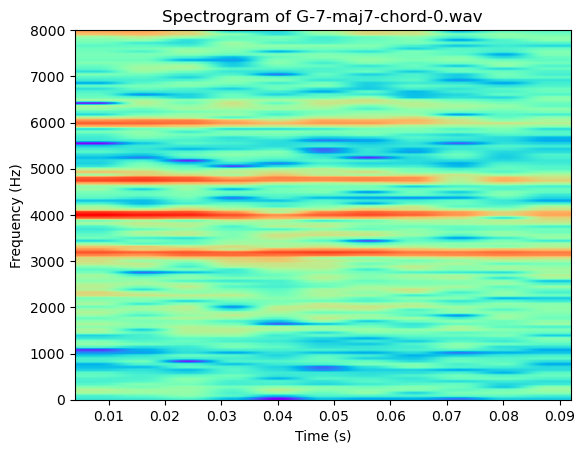

Sampling Frequency is 16000
Number of Samples
15.0
Print Spectrum Shape
[129  11]


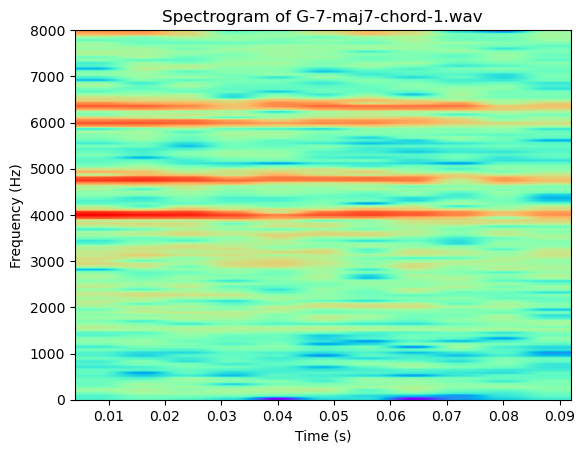

Sampling Frequency is 16000
Number of Samples
15.0
Print Spectrum Shape
[129  11]


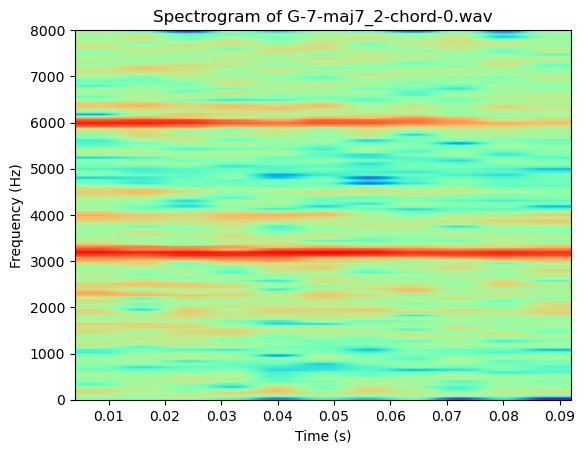

Sampling Frequency is 16000
Number of Samples
15.0
Print Spectrum Shape
[129  11]


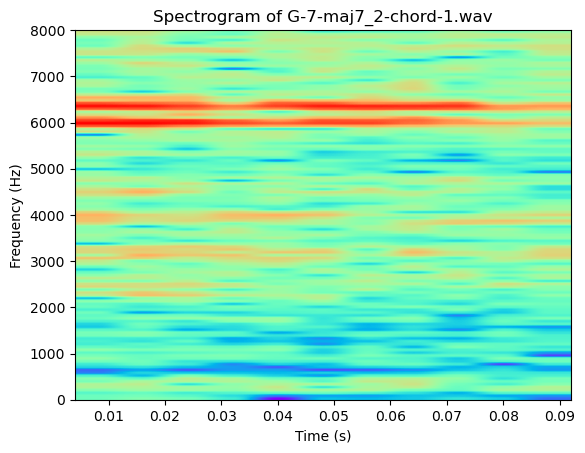

In [60]:
# Make function to plot spectrograms

def generate_spec(path, chordname):
    Fs, dyad = read(path + chordname)
    dyad = dyad[:,0]
    
    print("Sampling Frequency is", Fs)

    smallest_sample = .1 # s
    cutoff_time = 1.5 # where do we want to cut off (s) 
    print("Number of Samples")
    print(cutoff_time/smallest_sample)
    cutoff = int(smallest_sample*Fs) # where do we want to cut it off
    
    # Spectrogram
    spectrum, freqs, t, im = plt.specgram(dyad[cutoff*1:cutoff*2], Fs=Fs, cmap='rainbow')
    print("Print Spectrum Shape")
    print(np.array(spectrum.shape))
    plt.title("Spectrogram of " + chordname)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

chordname = 'G-7-maj7-chord-0.wav'
path = 'chords\maj7\\'
generate_spec(path, chordname)

chordname = 'G-7-maj7-chord-1.wav'
generate_spec(path, chordname)

chordname = 'G-7-maj7_2-chord-0.wav'
path = 'chords\maj7_2\\'
generate_spec(path, chordname)

chordname = 'G-7-maj7_2-chord-1.wav'
generate_spec(path, chordname)

After playing around with the spectrograms of each note and their variations I learned that each sound bite is actually very different. So there is not a lot for my model to learn from. To fix this I will subdivide the data into small chunks and only focus on the seventh iteration of each note (This is the one that showed the most distinct spectrograms visually). I divided it so that each data sample will have a 129x11 pixel spectrogram.

## An Aside on Music Theory and Data Notation

Here is a diagram on how the files in this dataset are organized:

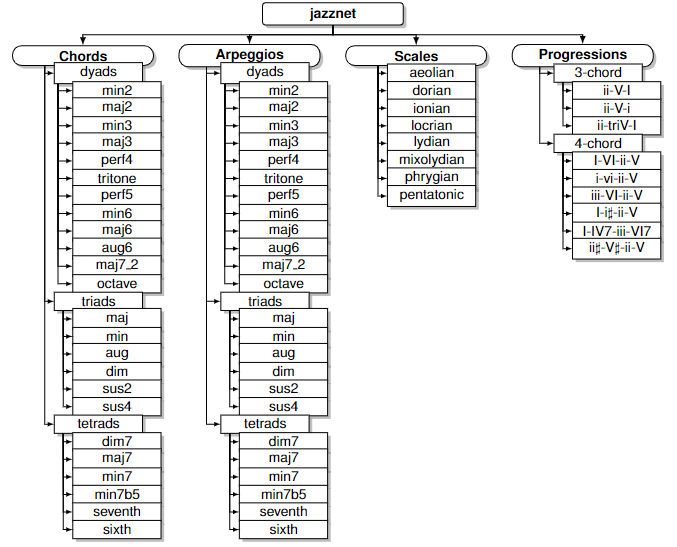

Below is the statistics of the data set:

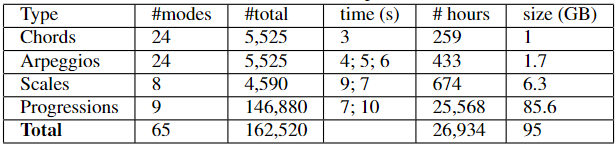

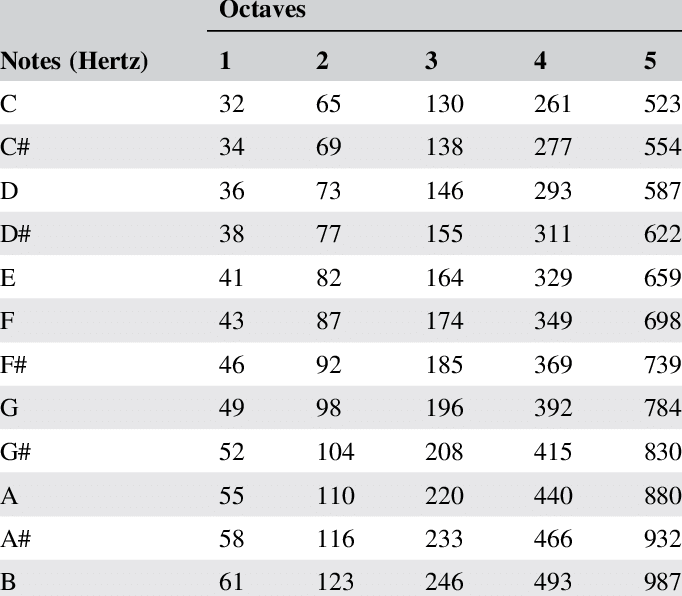

## Data Organization

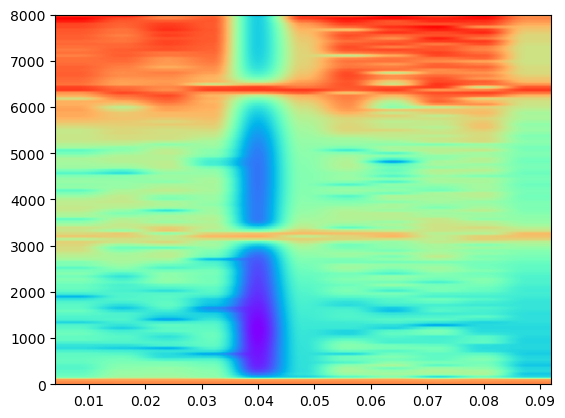

In [2]:
import os
from keras.utils import to_categorical

# Generate Spectrograms for training and validation data (will split 85:15)
Y_train = []
Y_val = []

X_train = []
X_val = []

smallest_sample = 0.1 # s
cutoff_time = 1.5 # where do we want to cut off (s) 
num_samples = int(cutoff_time/smallest_sample)

# Maj7_2 chords
myPath = "chords\maj7_2\\"

def assignX(index, classifier, newPath):
    Fs, data = read(newPath)
    data = data[:,0]
    cutoff = int(smallest_sample*Fs)
    # Spectrogram
    spectrum, freqs, t, im = plt.specgram(data[cutoff*index:cutoff*(index+1)], Fs=Fs, cmap='rainbow')

    if(index%4==0): # every fourth sample so ratio of train:val = 3:1
        # set Y_val and X_val
        Y_val.append(classifier)
        X_val.append(spectrum)
    else:
        # set Y_train and X_train
        Y_train.append(classifier)
        X_train.append(spectrum)
    
def assignData (myPath):
    samples = os.listdir(myPath)

    for chordpath in samples:
        newPath = myPath + chordpath
        val = False

        # Assign Label Based on File Path 0-11 = A-G
        if chordpath[0:3] == "A-7":
            for i in range(num_samples):
                assignX(i,0, newPath)
        elif chordpath[0:4] == "Ab-7":
            for i in range(num_samples):
                assignX(i,1, newPath)
        elif chordpath[0:3] == "B-7":
            for i in range(num_samples):
                assignX(i, 2, newPath)
        elif chordpath[0:4] == "Bb-7":
            for i in range(num_samples):
                assignX(i, 3, newPath)
        elif chordpath[0:4] == "C#-7":
            for i in range(num_samples):
                assignX(i, 4, newPath)
        elif chordpath[0:3] == "C-7":
            for i in range(num_samples):
                assignX(i, 5, newPath)
        elif chordpath[0:3] == "D-7":
            for i in range(num_samples):
                assignX(i, 6, newPath)
        elif chordpath[0:3] == "E-7":
            for i in range(num_samples):
                assignX(i, 7, newPath)
        elif chordpath[0:4] == "Eb-7":
            for i in range(num_samples):
                assignX(i, 8, newPath)
        elif chordpath[0:4] == "F#-7":
            for i in range(num_samples):
                assignX(i, 9, newPath)
        elif chordpath[0:3] == "F-7":
            for i in range(num_samples):
                assignX(i, 10, newPath)
        elif chordpath[0:3] == "G-7":
            for i in range(num_samples):
                assignX(i, 11, newPath)


# assign labels for maj7 chords
assignData(myPath)

# Normalize Data for values between 0 and 1 (inclusive). This makes CNN more efficient
# will also convert the list into an array

X_train = np.array(X_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)
Y_train = np.array(Y_train)

def normalize(X):
    minimum = X.min()
    maximum = X.max() + 1 # The 1 ensures that the values stay within 0,1
    scale = float(1.0/abs(maximum - minimum))
    X = X*scale
    return X

# I will not be normalizing it because this greatly reduces the validation accuracy, I think this is because the validation data and the training data are
# normalized on two different scales 
# X_train = normalize(X_train)
# X_val = normalize(X_val)

# # convert labels to one hot encoding for CNN

Y_val = to_categorical(Y_val)
Y_train = to_categorical(Y_train)

# Building the Model

In [56]:
print("X_train shape")
print(X_train.shape)
print("X_val shape")
print(X_val.shape)

X_train shape
(264, 129, 11)
X_val shape
(96, 129, 11)


In [58]:
# confirm using GPU - This took a lot of time to debug, I ended up having to run everything in miniconda instead
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))
tf.test.is_built_with_cuda()

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


True

In [3]:
import tensorflow as tf
def generate_model():
    model = tf.keras.Sequential([
        # first convolution layer
        tf.keras.layers.Conv2D(8, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)), # 
        tf.keras.layers.MaxPool2D(pool_size=2, strides=1),
        
        # fully connected classifier
        tf.keras.layers.Flatten(), # all features are flattened
        tf.keras.layers.Dense(X_train.shape[1]*X_train.shape[2], activation='relu'),
        tf.keras.layers.Dense(12, activation='softmax') # 12 outputs
    ])
    return model

cnn = generate_model()
cnn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 7, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 6, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5952)              0         
                                                                 
 dense (Dense)               (None, 1419)              8447307   
                                                                 
 dense_1 (Dense)             (None, 12)                17040     
                                                                 
Total params: 8,464,555
Trainable params: 8,464,555
Non-trainable params: 0
______________________________________________

In [4]:
history = cnn.fit(X_train, Y_train,
                        validation_data=(X_val, Y_val),
                        batch_size=64,
                        epochs=50,
                        verbose=1,
                        shuffle=True)

Epoch 1/50
5/5 [==============================] - 7s 106ms/step - loss: 2.3689 - accuracy: 0.2121 - val_loss: 1.8405 - val_accuracy: 0.5104
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 2.0654 - accuracy: 0.4470 - val_loss: 1.7434 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 1.9468 - accuracy: 0.3750 - val_loss: 1.6888 - val_accuracy: 0.4688
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 1.8406 - accuracy: 0.4432 - val_loss: 1.6389 - val_accuracy: 0.5208
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 1.7813 - accuracy: 0.4205 - val_loss: 1.5842 - val_accuracy: 0.5208
Epoch 6/50
5/5 [==============================] - 0s 21ms/step - loss: 1.7378 - accuracy: 0.4432 - val_loss: 1.5274 - val_accuracy: 0.5833
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 1.6845 - accuracy: 0.5189 - val_loss: 1.4871 - val_accuracy: 0.6042
Epoch 8/50
5/5 [==========

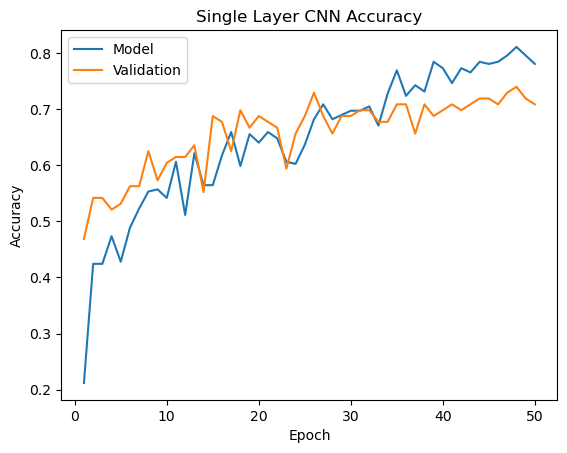

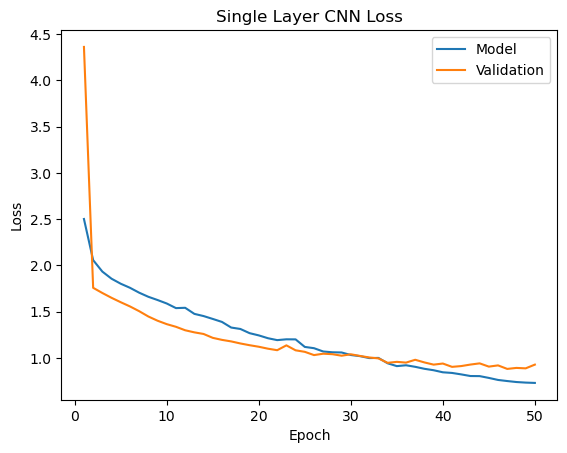

In [25]:
# Plot the model and validation accuracy as a function of epoch
x = range(1, 51)
plt.plot(x, history.history['accuracy'], label="Model")
plt.plot(x, history.history['val_accuracy'], label="Validation")
plt.title("Single Layer CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot model and validation loss versus epoch
plt.plot(x, history.history['loss'], label="Model")
plt.plot(x, history.history['val_loss'], label="Validation")
plt.title("Single Layer CNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

The validation accuracy flattens out around an epoch of 30. This is also where the loss gets larger than model. When I changed this to linear activation it gave a lower accuracy overall.

In [5]:
# Multi-layer Neural Net
import tensorflow as tf
# Will make padding = 'same' because
def generate_model2():
    model = tf.keras.Sequential([
        # first convolution layer
        tf.keras.layers.Conv2D(8, kernel_size=3, padding='valid', activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)), 
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=1),
        # tf.keras.layers.BatchNormalization(),

        # second convolution layer
        tf.keras.layers.Conv2D(16, kernel_size=3, padding='same', activation='relu'), 
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=1),
        # tf.keras.layers.BatchNormalization(),

        # third convolution layer
        tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'), 
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        # tf.keras.layers.BatchNormalization(),
        
        # fully connected classifier
        tf.keras.layers.Flatten(), # all features are flattened
        tf.keras.layers.Dense(X_train.shape[1]*X_train.shape[2], activation='relu'), # X_train.shape[1]*X_train.shape[2]
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(12, activation='softmax') # 12 outputs
    ])
    return model

cnn2 = generate_model2()
cnn2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 127, 9, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 8, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 8, 16)        1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 125, 7, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 7, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 3, 32)       

In [6]:
nepoch = 50
history2 = cnn2.fit(X_train, Y_train,
                        validation_data=(X_val, Y_val),
                        batch_size=64,
                        epochs=nepoch,
                        verbose=1,
                        shuffle=True)

Epoch 1/50
5/5 [==============================] - 2s 132ms/step - loss: 2.4299 - accuracy: 0.1894 - val_loss: 2.3370 - val_accuracy: 0.4062
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 2.1035 - accuracy: 0.3106 - val_loss: 1.7736 - val_accuracy: 0.4583
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 1.9387 - accuracy: 0.3939 - val_loss: 1.6885 - val_accuracy: 0.5208
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 1.8204 - accuracy: 0.3826 - val_loss: 1.5589 - val_accuracy: 0.5729
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 1.7035 - accuracy: 0.4773 - val_loss: 1.4233 - val_accuracy: 0.5208
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 1.6173 - accuracy: 0.4470 - val_loss: 1.2834 - val_accuracy: 0.5938
Epoch 7/50
5/5 [==============================] - 0s 20ms/step - loss: 1.6283 - accuracy: 0.5038 - val_loss: 1.2300 - val_accuracy: 0.5938
Epoch 8/50
5/5 [==========

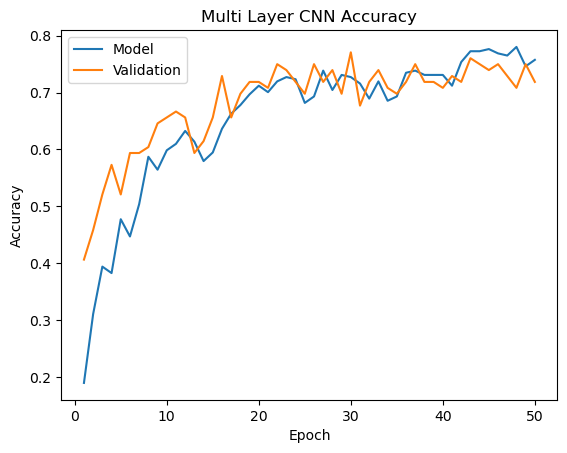

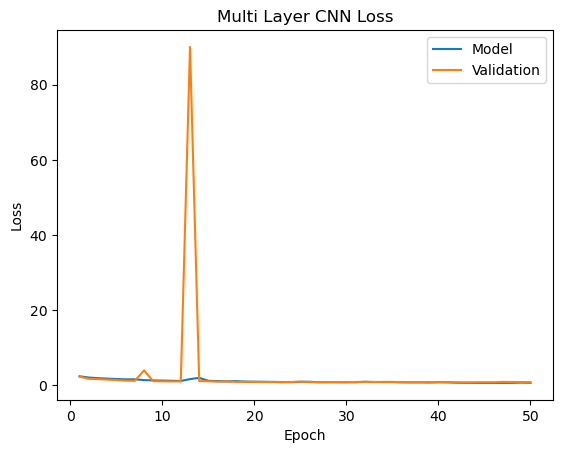

In [7]:
# Plot the model and validation accuracy as a function of epoch
x = range(1, nepoch+1)
plt.plot(x, history2.history['accuracy'], label="Model")
plt.plot(x, history2.history['val_accuracy'], label="Validation")
plt.title("Multi Layer CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot model and validation loss versus epoch
plt.plot(x, history2.history['loss'], label="Model")
plt.plot(x, history2.history['val_loss'], label="Validation")
plt.title("Multi Layer CNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Having a three layer CNN model with same padding in the last two layers and the number of filters increasing by a power of two yields a better model and validation accuracy. The optimal number of epochs was 50 since any higher the validation loss would drastically increase. I also messed around with average pooling, strides and linear activation. This combination for a three layer model was the best one.

### Visualizing Feature Maps for Multi-Layer CNN Model

Kernel Shape:
(3, 3, 1, 8)



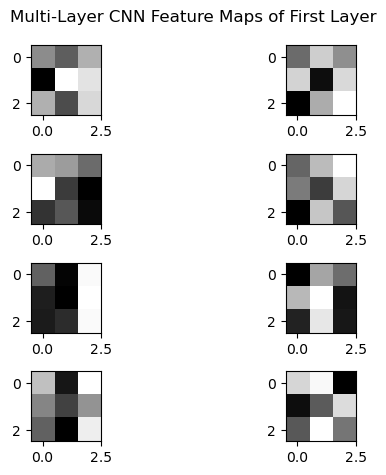

In [43]:
# Make grey scale plot of optimal kernel - should provide insight into how model works (feature maps)
# normalization code from: [https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/]

# Get and Normalize Weights
my_kernel=cnn2.get_weights()[0] # This is for the first layer so there are 8 feature maps
print("Kernel Shape:")
print(my_kernel.shape)
print()
f_min, f_max = my_kernel.min(), my_kernel.max()
my_kernel = (my_kernel - f_min) / (f_max - f_min) # ohh this is the normalization method

# Function to generate feature maps
def generate_map(index, kernel):
    map = np.array([kernel[:, 0][:, 0][:, index], kernel[:, 1][:, 0][:, index], kernel[:, 2][:, 0][:, index]])
    return map

# Plot all 8 maps
fig, axs = plt.subplots(4, 2)
fig.suptitle('Multi-Layer CNN Feature Maps of First Layer')
for i in range(8):
    if i < 4:
        axs[i, 0].imshow(generate_map(i, my_kernel), cmap="gray") 
    else:
        axs[i-4, 1].imshow(generate_map(i, my_kernel), cmap="gray")
plt.tight_layout()  # Gets rid of overlapping
plt.show() 

# Model Testing

In this next section, I wanted to play around with the predict function in tensorflow. I first used the validation data and showed it was able to accuractely identify A and Ab maj7_2 chords.

In [54]:
# Use predict for model (testing)
print(cnn2.predict(np.array([X_val[8]])))
print(Y_val[8]) # It is able to acccurately predict Ab Maj7_2 chord (index = 1), also tested for A chord

1/1 [==============================] - 0s 24ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
